# CNN - Simple Architecture

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, auc
# from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-11-14 12:57:21.048151: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 12:57:21.091252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731607041.110445   18656 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731607041.116452   18656 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 12:57:21.152532: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Preparation for trainning - Train Split

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 7632 files belonging to 8 classes.
Using 6106 files for training.


I0000 00:00:1731607044.132290   18656 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
classes_ = train_ds.class_names
classes_

['Density1Benign',
 'Density1Malignant',
 'Density2Benign',
 'Density2Malignant',
 'Density3Benign',
 'Density3Malignant',
 'Density4Benign',
 'Density4Malignant']

In [5]:
classes_ = train_ds.class_names
len(classes_)

8

In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 7632 files belonging to 8 classes.
Using 1526 files for validation.


In [7]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds, val_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Preparation for trainning - Test Split

In [8]:
train_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 212 files belonging to 8 classes.
Using 170 files for training.


In [9]:
val_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 212 files belonging to 8 classes.
Using 42 files for validation.


In [10]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds_test = train_ds_test.map(normalize)
val_ds_test = val_ds_test.map(normalize)

train_ds_test, val_ds_test

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Training

In [11]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', kernel_initializer="HeNormal",input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer="HeNormal"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')
])

/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
dummy_input = np.zeros((1, 224, 224, 3))
_ = model(dummy_input)

I0000 00:00:1731607045.737045   18656 cuda_dnn.cc:529] Loaded cuDNN version 90300


In [13]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [14]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/50


I0000 00:00:1731607047.313562   18756 service.cc:148] XLA service 0x7f8ca000acf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731607047.313877   18756 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-14 12:57:27.591104: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731607050.698497   18756 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.2771 - loss: 2.4352 - val_accuracy: 0.3467 - val_loss: 1.5993
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.4613 - loss: 1.3858 - val_accuracy: 0.6114 - val_loss: 1.0418
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7555 - loss: 0.6942 - val_accuracy: 0.7837 - val_loss: 0.6351
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9277 - loss: 0.2323 - val_accuracy: 0.8598 - val_loss: 0.4984
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9807 - loss: 0.0755 - val_accuracy: 0.8991 - val_loss: 0.4259
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9957 - loss: 0.0253 - val_accuracy: 0.9148 - val_loss: 0.4070
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9994 - loss: 0.0082 - val_accuracy: 0.9220 - val_loss: 0.4229
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.92

# Evaluating

In [15]:
history.history

{'accuracy': [0.3056010603904724,
  0.5258761644363403,
  0.8090403079986572,
  0.9466099143028259,
  0.9842777848243713,
  0.997707188129425,
  0.9991811513900757,
  0.9995086789131165,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.8982831239700317,
  1.2372854948043823,
  0.5445821285247803,
  0.17865456640720367,
  0.06329860538244247,
  0.018292685970664024,
  0.00848368089646101,
  0.004317845683544874,
  0.0013186713913455606,
  0.0007434661383740604,
  0.0005424393457360566,
  0.00042511511128395796,
  0.00033970564254559577,
  0.00027963455067947507,
  0.0002313221775693819,
  0.00019259154214523733,
  0.0001622198906261474,
  0.00013676151866093278,
  0.00011582034494495019,
  9.715023043099791e-05,
  8.206508937291801e-

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,932,922 (68.41 MB)

 Trainable params: 5,977,640 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,955,282 (45.61 MB)

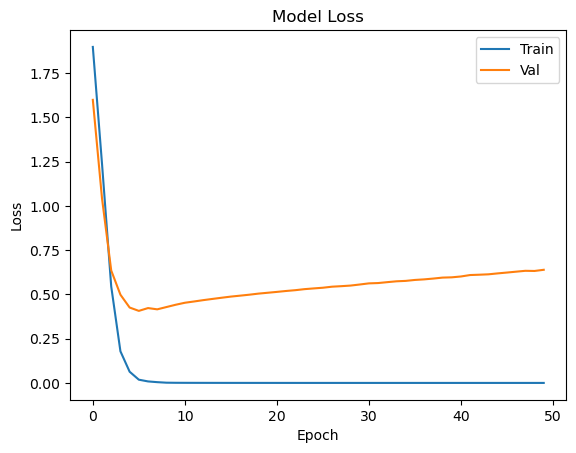

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

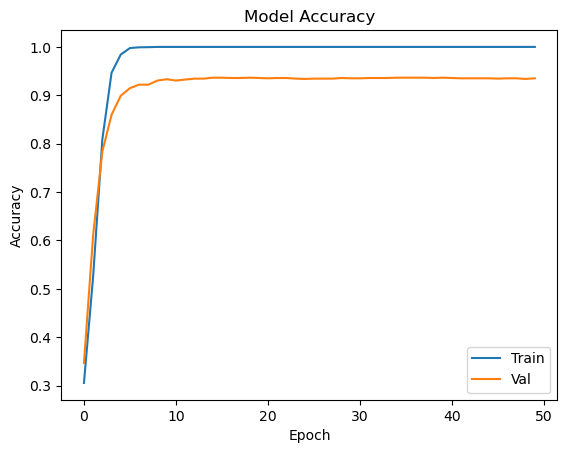

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

48/48 - 0s - 6ms/step - accuracy: 0.9351 - loss: 0.6392


In [20]:
print(test_acc)

0.9351245164871216


In [21]:
predictions = model.predict(train_ds_test)
val_pred = np.argmax(predictions, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [22]:
y_true = []
y_pred = []
for images, labels in val_ds_test:
  # Make predictions on the batch
  batch_pred = model.predict(images)
  y_pred.extend(list(batch_pred.argmax(axis=1)))  # Predicted labels
  y_true.extend(list(labels.numpy()))  # True labels from the batch

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


2024-11-14 13:01:15.252348: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


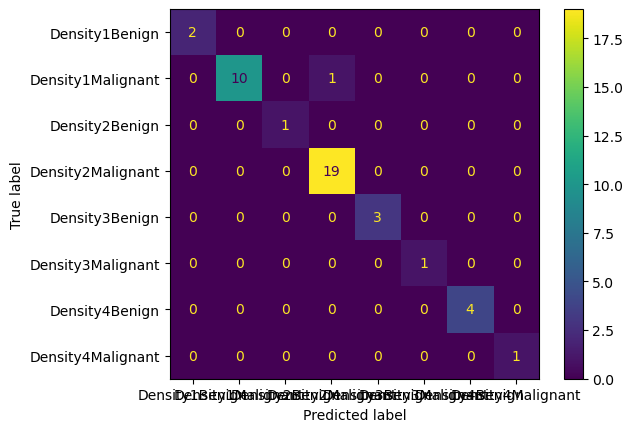

In [23]:
disp = ConfusionMatrixDisplay(cm, display_labels=classes_,)
disp.plot()

In [24]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         1
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.98        42
   macro avg       0.99      0.99      0.99        42
weighted avg       0.98      0.98      0.98        42



In [25]:
# fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Test

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = 'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/Density2Benign/20586960.png'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = x / 255.0  
x = np.expand_dims(x, axis=0)  

preds = model.predict(x)
predicted_class_index = np.argmax(preds[0])

class_labels = classes_  
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Predicted class: Density2Benign


# Heatmap

In [27]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

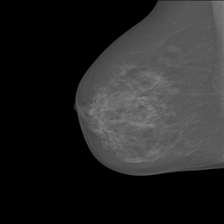

In [28]:
img_size = (224, 224, 3)
dummy_input = np.zeros((1, 224, 224, 3))
_ = model(dummy_input)
last_conv_layer_name = 'conv2d_1'
img_path = 'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/Density2Benign/20586960.png'
display(Image(img_path))

In [29]:
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = x / 255.0  
x = np.expand_dims(x, axis=0)

In [30]:
preds = model.predict(x)
predicted_class_index = np.argmax(preds[0])
class_labels = classes_  
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted class: Density2Benign


In [31]:
conv_layer_output = model.get_layer(last_conv_layer_name).output


In [36]:
grad_model = keras.models.Model(
    [model.inputs],
    [model.get_layer(last_conv_layer_name).output,
     model.get_layer('conv2d_1').output]) #right here you should put your last layer's name (you can figure that out from running model.summary) mine was 'dense_2'

grad_model = Model(
    inputs=model.inputs,
    outputs=[conv_layer_output, model.output]
)

In [40]:
with tf.GradientTape() as tape:
    # Forward pass through grad_model
    last_conv_layer_output, preds = grad_model(x)
        
    # Use the predicted class if no index is provided
    # pred_index = tf.argmax(preds[0])
    class_channel = preds[:, predicted_class_index]

    # Compute the gradient of the top predicted class for the input image
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute pooled gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap.numpy()

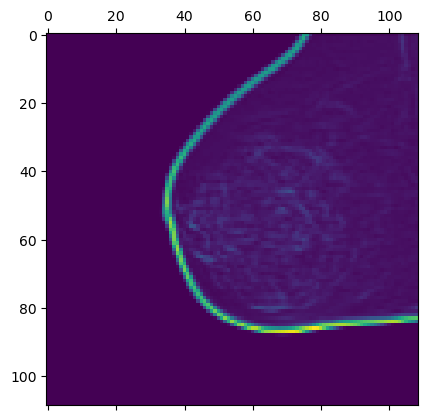

In [41]:
# Generate class activation heatmap
# heatmap = make_gradcam_heatmap(img_array=x, model=model, last_conv_layer_name=conv_layer_output)

# Display heatmap
plt.matshow(heatmap)
plt.show()

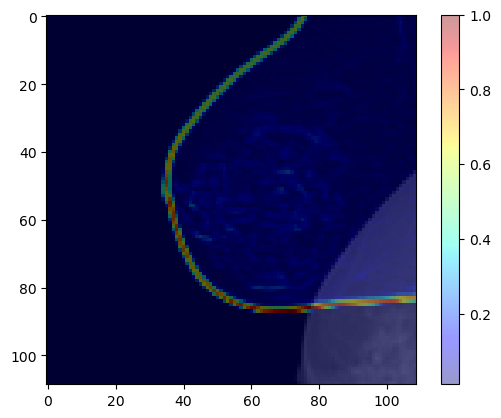

In [43]:
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.colorbar()
plt.show()

In [ ]:
# ValueError: layers are: ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1'].

# Save

In [ ]:
# model.save('models/breast_cancer_classification-sa.h5')

In [ ]:
# model.export('models/breast_cancer_classification-sa-export.h5')